**Importing the zip file**

In [1]:
from zipfile import ZipFile
file_name='meat_meat.zip'
with ZipFile(file_name,'r')as zip:
 zip.extractall()
print('Finished')

Finished


**Importing the libraries**

In [2]:
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
from keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras
import matplotlib.pyplot as plt


**Fresh Meat**

       Fresh meat example


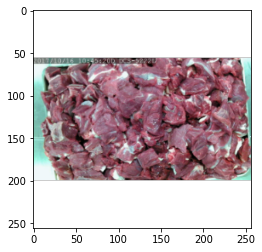

In [3]:
print(f"       Fresh meat example")
path = '/content/meat_last/Test/Fresh/test_20171016_104521D.png'
img=mpimg.imread(path)
imgplot=plt.imshow(img)

 **Spoiled Meat**

       Spoiled Meat Example


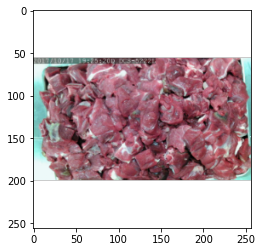

In [ ]:
print(f"       Spoiled Meat Example")
path='/content/meat_last/Test/Spoiled/test_20171017_192521D.png'
img=mpimg.imread(path)
imgplot=plt.imshow(img)

In [4]:
path_to_train = "/content/meat_last/Train"
path_to_test = "/content/meat_last/Test"

In [5]:
Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(path_to_train, (256, 256), batch_size=32)
test_data = Generator.flow_from_directory(path_to_test, (256, 256), batch_size=32)

Found 1106 images belonging to 2 classes.
Found 790 images belonging to 2 classes.


#**2.KISIM: Kendinize özgü bir CNN oluşturunuz.**  
**Creating our Model**

In [6]:
model=Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2,activation='sigmoid'))


**Compiling the model**

In [7]:
from tensorflow import keras
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

#**4.KISIM: Modelinizi eğitim verisi ile eğitirken, doğrulama verisi ile performansını gözleyecek şekilde history öğesine kaydediniz.** 
**Training the Model**

In [ ]:
history= model.fit_generator(train_data,steps_per_epoch=1000//30,epochs=30,
verbose=1,
validation_data=test_data,validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
33/33 [==============================] - 5s 151ms/step - loss: 0.1915 - accuracy: 0.9271 - val_loss: 0.5269 - val_accuracy: 0.6667
Epoch 2/30
33/33 [==============================] - 5s 152ms/step - loss: 0.1962 - accuracy: 0.9175 - val_loss: 0.5113 - val_accuracy: 0.7812
Epoch 3/30
33/33 [==============================] - 5s 150ms/step - loss: 0.1604 - accuracy: 0.9347 - val_loss: 0.4680 - val_accuracy: 0.6979
Epoch 4/30
33/33 [==============================] - 5s 152ms/step - loss: 0.1732 - accuracy: 0.9290 - val_loss: 0.4139 - val_accuracy: 0.9479
Epoch 5/30
33/33 [==============================] - 5s 151ms/step - loss: 0.1511 - accuracy: 0.9451 - val_loss: 0.4064 - val_accuracy: 0.9375
Epoch 6/30
33/33 [==============================] - 5s 152ms/step - loss: 0.1522 - accuracy: 0.9376 - val_loss: 0.4915 - val_accuracy: 0.7083
Epoch 7/30
33/33 [==============================] - 5s 150ms/step - loss: 0.1702 - accuracy: 0.9405 - val_loss: 0.3133 - val_accuracy: 0.9896
Epoch 

#**3.      KISIM: CNN modelinizin özetini çıktı olarak alınız (summary).**

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 253, 253, 32)      1568      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 126, 126, 32)     0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 123, 123, 64)      32832     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 61, 61, 64)      

#**5.KISIM: History’e kaydettiğiniz Eğitim ve doğrulama kaybı (training and validation loss) ve eğitim ve doğrulama başarısının (training and validation accuracy) değişimini grafik olarak çizdiriniz**
**Ploting the Graph for training and validation accurancy**

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Traning acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()
plt.figure()


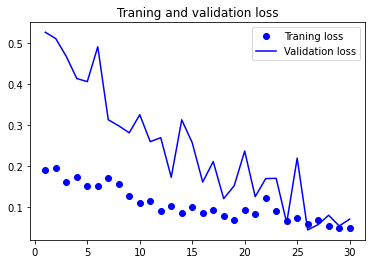

In [ ]:
plt.plot(epochs,loss,'bo',label='Traning loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()
plt.show()

#**6.KISIM: Overfitting görüyorsanız dropout ve augmentation ekleyerek bunu gidermeye çalışınız.**
#**7.KISIM: Overfitting yok olduysa modelinizin kapasitesini (katman sayısı ve katmanlardaki nöron sayısı) artırınız. Başarınızın önünüzdeki tek engel overfitting kalıncaya kadar 6. KISIM ve 7. KISIM’ı tekrar ediniz.**

IMPROVING THE MODEL

In [8]:
model=Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [9]:
from tensorflow import keras
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history= model.fit_generator(train_data,steps_per_epoch=1000//30,epochs=30,
verbose=1,
validation_data=test_data,validation_steps = 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/30
33/33 [==============================] - 5s 163ms/step - loss: 0.6215 - accuracy: 0.7054 - val_loss: 0.5458 - val_accuracy: 0.8854
Epoch 2/30
33/33 [==============================] - 5s 155ms/step - loss: 0.4630 - accuracy: 0.7850 - val_loss: 0.3962 - val_accuracy: 0.9792
Epoch 3/30
33/33 [==============================] - 5s 157ms/step - loss: 0.2790 - accuracy: 0.8944 - val_loss: 0.1669 - val_accuracy: 0.9167
Epoch 4/30
33/33 [==============================] - 5s 155ms/step - loss: 0.2176 - accuracy: 0.9127 - val_loss: 0.1162 - val_accuracy: 0.9688
Epoch 5/30
33/33 [==============================] - 5s 153ms/step - loss: 0.2369 - accuracy: 0.9175 - val_loss: 0.2709 - val_accuracy: 0.9167
Epoch 6/30
33/33 [==============================] - 5s 156ms/step - loss: 0.1655 - accuracy: 0.9299 - val_loss: 0.0994 - val_accuracy: 0.9583
Epoch 7/30
33/33 [==============================] - 5s 156ms/step - loss: 0.1557 - accuracy: 0.9299 - val_loss: 0.1615 - val_accuracy: 0.9375
Epoch 

<Figure size 432x288 with 0 Axes>

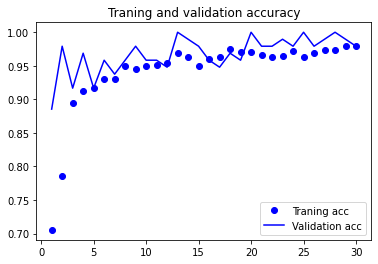

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Traning acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Traning and validation accuracy')
plt.legend()
plt.figure()

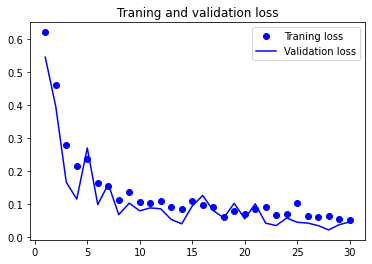

In [ ]:
plt.plot(epochs,loss,'bo',label='Traning loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Traning and validation loss')
plt.legend()
plt.show()

#**8.      KISIM: Overfitting’in başladığı noktayı tespit edip buna göre kaç epoch eğitmeniz gerektiğine karar veriniz**

The best result I had when I was using 30 epoachs.

#**9-10-11 Kisimlar**

In [12]:
model.evaluate(test_data)

35/35 [==============================] - 50s 1s/step - loss: 2.3722 - accuracy: 0.5000


[2.3721671104431152, 0.5]

Firstly I uploaded the zip file where we have all our meat datas.The meat photos were very similar to each other.After I imported the libraries and created a model I started training that model.After training the results were not too much satisfying,this can be seen very easily from the graphs.To improve the model  I have changed the number of filters and also the size of them.At the same time I increased the number of neurons and because I had just to classes I used Sigmoid output activation.If I will write about epoach number I tried many times different types of epoachs from 5 to 50 (my Pc capasity )and the best result was when I was using 30 epoachs. .After retraining the model as it can be seen from the graphs our model had a great impovement.